In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.signal import find_peaks as fp
from mpmath import ellipk,log
from scipy.special import gamma as GAMMA
from scipy.special import expit
import os 
#from mpl_toolkits import mplot3d
from scipy.optimize import fmin_cg, fmin_tnc, curve_fit, newton, bisect, fsolve
from SourcesTBG import *
from MoreSources import *
from scipy.misc import derivative as scider
import pandas as pd
from scipy.linalg import eigh,eig,eigvalsh
from functools import partial
import seaborn as sns
from FeynmanHellman import *
from saddlefinder import *
import csv
from Decorators import *
from YuanDos import *
from DosHelper import *
TO_DEGREE = 1.0/0.018326
IN_RADIAN = np.pi/180
vFpar = 4.31074647887324
wpar=0.11
BANDS = 8

In [2]:
BASE_PATH = "C:/Users/Aravi/OneDrive/Documents/DataSets/dos/"
if not os.path.exists(BASE_PATH):
     raise(Exception("CHECK THE BASE PATH"))

In [3]:
FILENAME = "dos_th1.05.dat"
PATH = os.path.join(BASE_PATH, FILENAME)
if not os.path.exists(PATH):
    raise(Exception("FILE DOES NOT EXIST"))

ret = ret_alpha_beta_Ev(1.05)
Ev = ret[1]

In [4]:
df = pd.read_csv(PATH,header=None)
df.columns = ['E','DOS']
df.head()

,E,DOS
0,-1.000000,0.375000
1,-0.998004,0.375187
2,-0.996012,0.375375
3,-0.994024,0.375562
4,-0.992040,0.375750


(0.0, 1e-08)

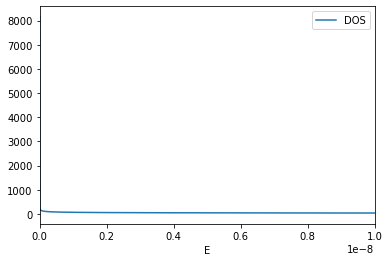

In [19]:
#df.plot(x='E',y='DOS',loglog=True)  #This one is only for magic angle
df.plot(x='E',y='DOS')
plt.xlim(0,0.00000001)
#plt.ylim(0,0.5)

In [6]:
idxE0 = df.query('E<0.000000000000000001 and E>-0.00000000000000001')['DOS'].idxmin()
df.iloc[[idxE0,idxE0+1]]

,E,DOS
19592,-9.990788e-18,6670.084375
19593,-9.970847e-18,6673.416919


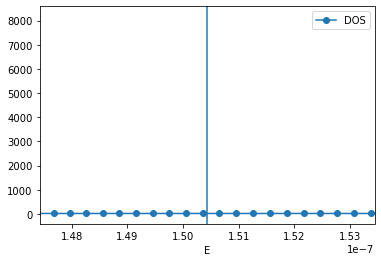

In [7]:
#df.plot(marker='o')
df.plot(x='E',y='DOS',marker='o')
plt.xlim(0.98*Ev/3,1.02*Ev/3)
plt.axvline(Ev/3)

In [8]:
ret

(array([-1.05224064e-03,  7.63357044e+01]),
 4.512924733571832e-07,
 (array([0.00990726, 0.04297587]), 303, 3))